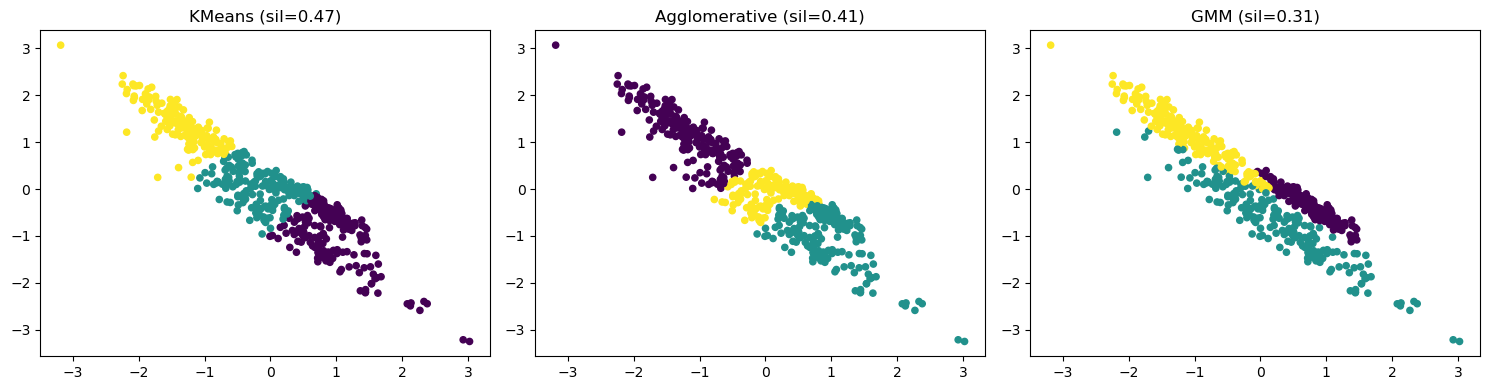

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Step 1: Generate tricky, non-trivial clustered data
def generate_data(n_samples=600, random_state=42):
    centers = [[0, 0], [3, 3], [0, 4]]
    cluster_std = [1.5, 0.5, 1.0]  # Different variances = overlapping clusters
    X, y_true = make_blobs(n_samples=n_samples, centers=centers,
                           cluster_std=cluster_std, random_state=random_state)

    # Apply affine transformation to add anisotropy
    transformation = [[0.6, -0.6], [-0.4, 0.8]]
    X_aniso = np.dot(X, transformation)

    # Normalize
    X_scaled = StandardScaler().fit_transform(X_aniso)
    return X_scaled, y_true

# Step 2: Plotting function
def plot_clusters(X, labels_list, titles):
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    for ax, labels, title in zip(axes, labels_list, titles):
        ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=20)
        ax.set_title(title)
    plt.tight_layout()
    plt.show()

# Step 3: Clustering methods
def cluster_and_plot(X, n_clusters=3):
    # KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels_kmeans = kmeans.fit_predict(X)
    sil_kmeans = silhouette_score(X, labels_kmeans)

    # Agglomerative Clustering
    agglo = AgglomerativeClustering(n_clusters=n_clusters)
    labels_agglo = agglo.fit_predict(X)
    sil_agglo = silhouette_score(X, labels_agglo)

    # Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=0)
    labels_gmm = gmm.fit_predict(X)
    sil_gmm = silhouette_score(X, labels_gmm)

    # Plot
    plot_clusters(X,
                  [labels_kmeans, labels_agglo, labels_gmm],
                  [f"KMeans (sil={sil_kmeans:.2f})",
                   f"Agglomerative (sil={sil_agglo:.2f})",
                   f"GMM (sil={sil_gmm:.2f})"])

# Run the whole process
if __name__ == "__main__":
    X, y_true = generate_data()
    cluster_and_plot(X)
